In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import uuid
import os
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, TimeDistributed

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
dataset_path = '/content/drive/MyDrive/BIGDATA'
os.listdir(dataset_path)

['Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
 'Friday-WorkingHours-Morning.pcap_ISCX.csv',
 'Monday-WorkingHours.pcap_ISCX.csv',
 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
 'Tuesday-WorkingHours.pcap_ISCX.csv',
 'Wednesday-workingHours.pcap_ISCX.csv']

In [6]:
dataset_files = [
    'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
    'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
    'Friday-WorkingHours-Morning.pcap_ISCX.csv',
    'Monday-WorkingHours.pcap_ISCX.csv',
    'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
    'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
    'Tuesday-WorkingHours.pcap_ISCX.csv',
    'Wednesday-workingHours.pcap_ISCX.csv'
]

dataframes = []
for file in dataset_files:
    file_path = os.path.join(dataset_path, file)
    df = pd.read_csv(file_path)
    print(f"Loaded {file}: {df.shape}")
    dataframes.append(df)

df = pd.concat(dataframes, ignore_index=True)

Loaded Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv: (286467, 79)
Loaded Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv: (225745, 79)
Loaded Friday-WorkingHours-Morning.pcap_ISCX.csv: (191033, 79)
Loaded Monday-WorkingHours.pcap_ISCX.csv: (529918, 79)
Loaded Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv: (288602, 79)
Loaded Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv: (170366, 79)
Loaded Tuesday-WorkingHours.pcap_ISCX.csv: (445909, 79)
Loaded Wednesday-workingHours.pcap_ISCX.csv: (692703, 79)


In [7]:
df.shape

(2830743, 79)

In [8]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [9]:
df.columns = df.columns.str.strip().str.lower()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   destination port             int64  
 1   flow duration                int64  
 2   total fwd packets            int64  
 3   total backward packets       int64  
 4   total length of fwd packets  int64  
 5   total length of bwd packets  int64  
 6   fwd packet length max        int64  
 7   fwd packet length min        int64  
 8   fwd packet length mean       float64
 9   fwd packet length std        float64
 10  bwd packet length max        int64  
 11  bwd packet length min        int64  
 12  bwd packet length mean       float64
 13  bwd packet length std        float64
 14  flow bytes/s                 float64
 15  flow packets/s               float64
 16  flow iat mean                float64
 17  flow iat std                 float64
 18  flow iat max                 int64  
 19  

In [11]:
df.isnull().sum()

,0
destination port,0
flow duration,0
total fwd packets,0
total backward packets,0
total length of fwd packets,0
...,...
idle mean,0
idle std,0
idle max,0
idle min,0


In [12]:
print(df.replace([np.inf, -np.inf], np.nan).isnull().sum())

destination port               0
flow duration                  0
total fwd packets              0
total backward packets         0
total length of fwd packets    0
                              ..
idle mean                      0
idle std                       0
idle max                       0
idle min                       0
label                          0
Length: 79, dtype: int64


In [13]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df.shape

(2827876, 79)

In [14]:
df.drop_duplicates(inplace=True)
df.shape

(2520798, 79)

In [15]:
zero_variance_cols = df.columns[df.nunique() <= 1]
zero_variance_cols
df.drop(columns=zero_variance_cols, inplace=True)
df.shape

(2520798, 71)

In [16]:
duplicate_cols = [col for col in df.columns if col.endswith('.1')]
duplicate_cols
df.drop(columns=duplicate_cols, inplace=True)
df.shape

(2520798, 70)

In [17]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])
label_encoder.classes_

array(['BENIGN', 'Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk',
       'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'Heartbleed',
       'Infiltration', 'PortScan', 'SSH-Patator',
       'Web Attack � Brute Force', 'Web Attack � Sql Injection',
       'Web Attack � XSS'], dtype=object)

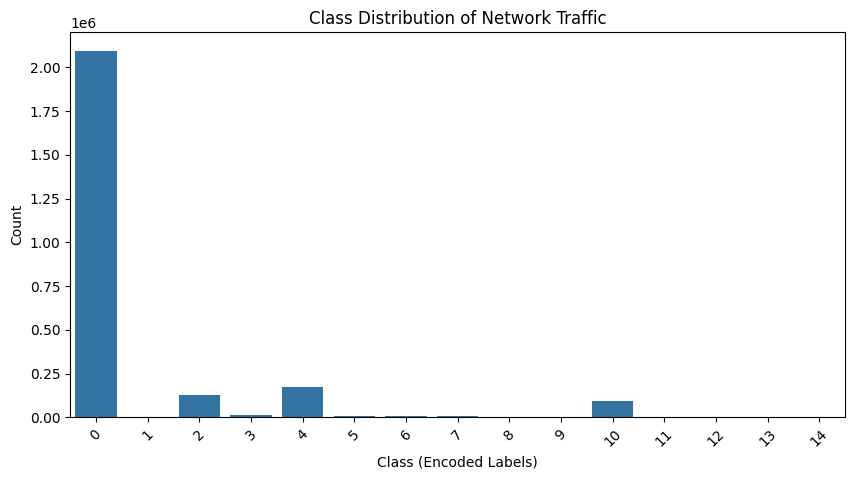

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=df)
plt.title('Class Distribution of Network Traffic')
plt.xlabel('Class (Encoded Labels)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [19]:
class_counts = df['label'].value_counts()
print(class_counts)
print(dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_)))

label
0     2095057
4      172846
2      128014
10      90694
3       10286
7        5931
6        5385
5        5228
11       3219
1        1948
12       1470
14        652
9          36
13         21
8          11
Name: count, dtype: int64
{0: 'BENIGN', 1: 'Bot', 2: 'DDoS', 3: 'DoS GoldenEye', 4: 'DoS Hulk', 5: 'DoS Slowhttptest', 6: 'DoS slowloris', 7: 'FTP-Patator', 8: 'Heartbleed', 9: 'Infiltration', 10: 'PortScan', 11: 'SSH-Patator', 12: 'Web Attack � Brute Force', 13: 'Web Attack � Sql Injection', 14: 'Web Attack � XSS'}


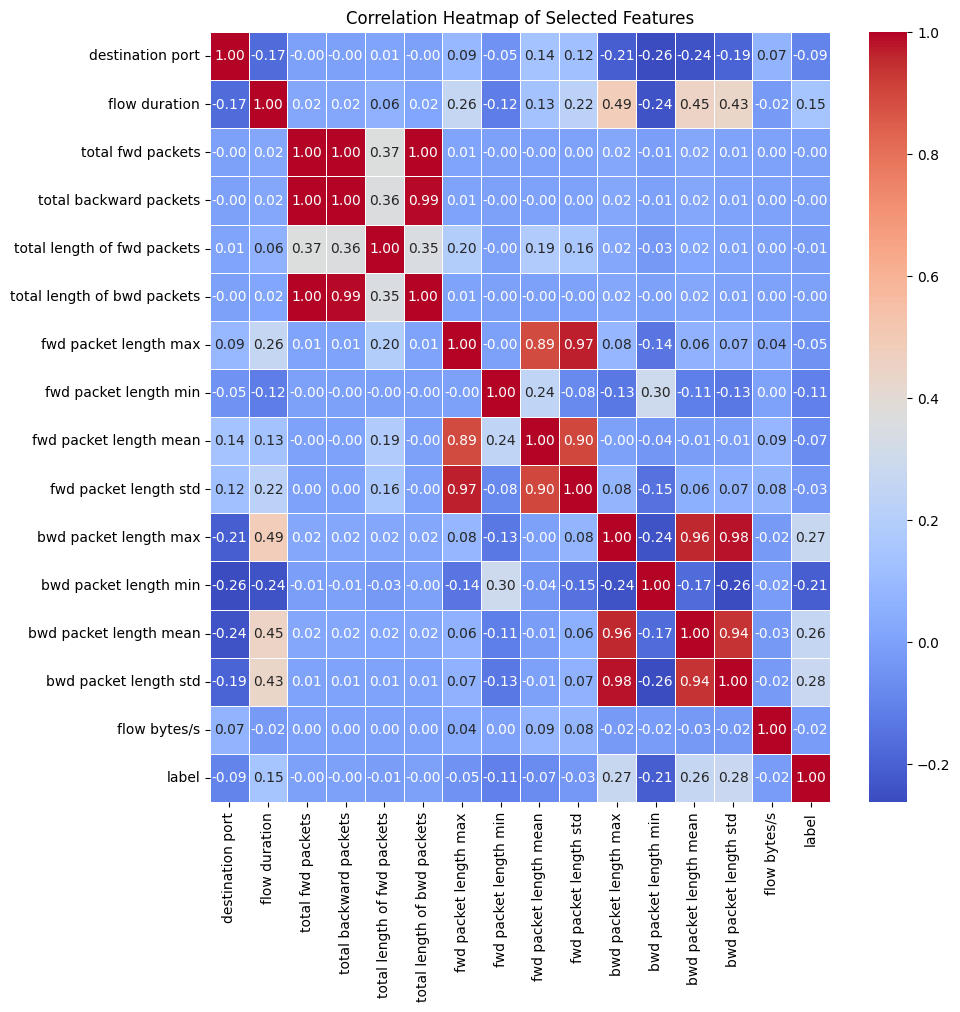

In [20]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
# Avoid too many features in heatmap for clarity, let's pick a sample or top N
sample_cols_for_heatmap = list(numerical_cols[:15]) + ['label'] #
if 'label' not in sample_cols_for_heatmap and 'label' in df.columns:
    sample_cols_for_heatmap.append('label')


plt.figure(figsize=(10, 10))
correlation_matrix = df[sample_cols_for_heatmap].corr() #
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

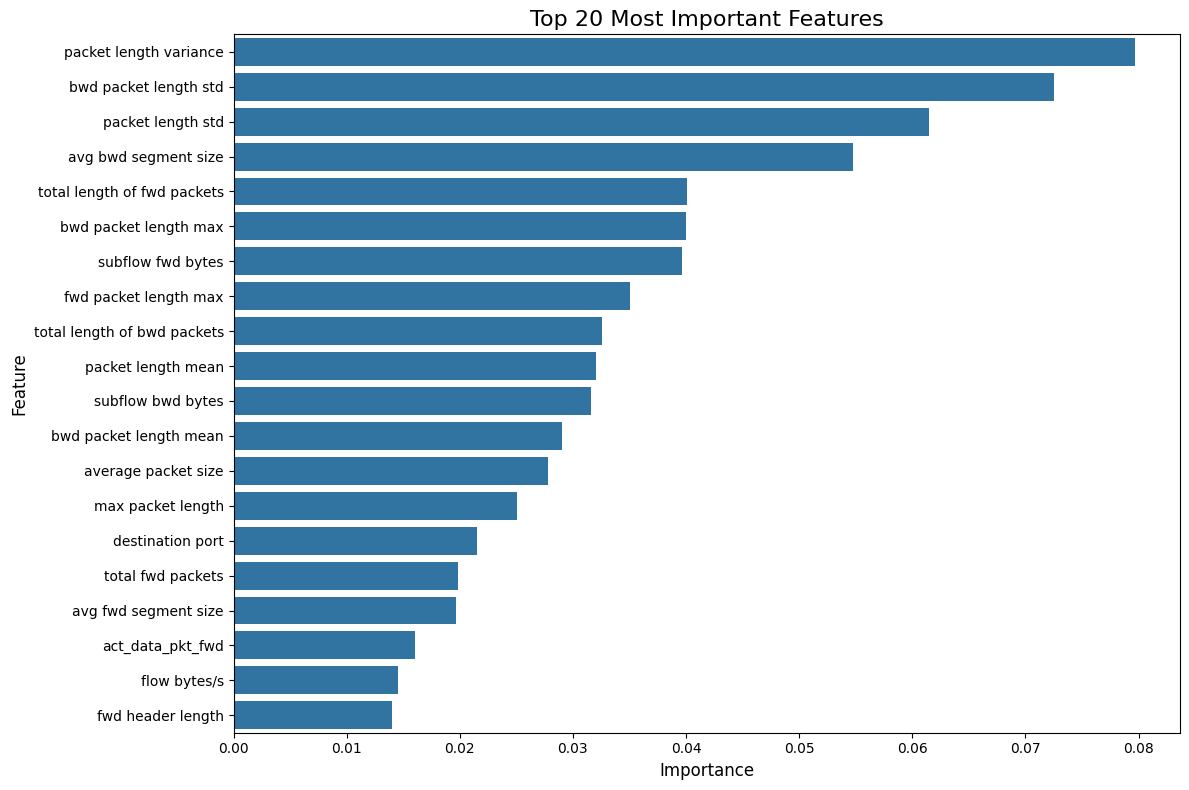

In [21]:
sample_size = min(100000, len(df))
df_sample = df.sample(sample_size, random_state=42)

X = df_sample.drop('label', axis=1)
y = df_sample['label']

# Train a Random Forest to get feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X, y)

# Plot feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Most Important Features', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

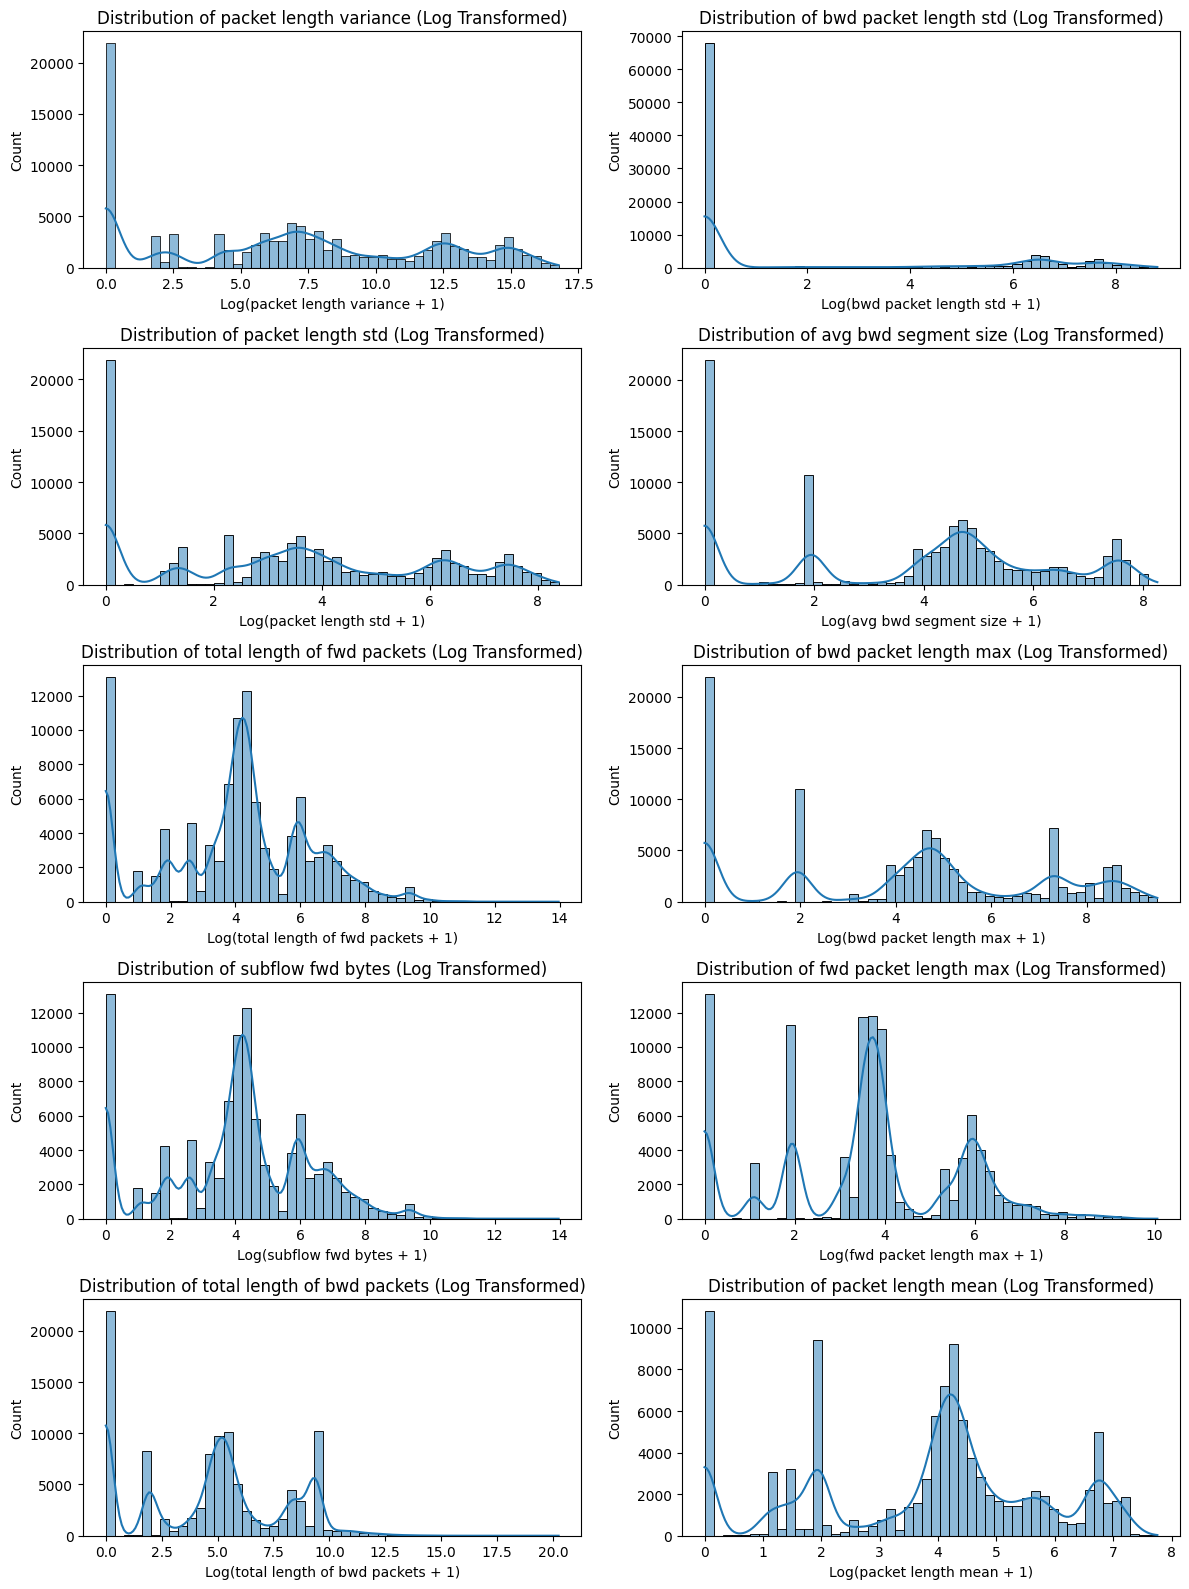

In [22]:
# Select top 10 important features
top_features = feature_importance['feature'].head(10).values
plt.figure(figsize=(12, 16))

for i, feature in enumerate(top_features, 1):
    plt.subplot(5, 2, i)

    # Apply a pseudo-log transformation to handle zeros and skewed data # Adding 1 to avoid log(0), then taking the log
    data = df_sample[feature]
    data_transformed = np.log1p(data)  # log1p(x) = log(1 + x)
    sns.histplot(data_transformed, kde=True, bins=50)
    plt.title(f'Distribution of {feature} (Log Transformed)')
    plt.xlabel(f'Log({feature} + 1)')
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()

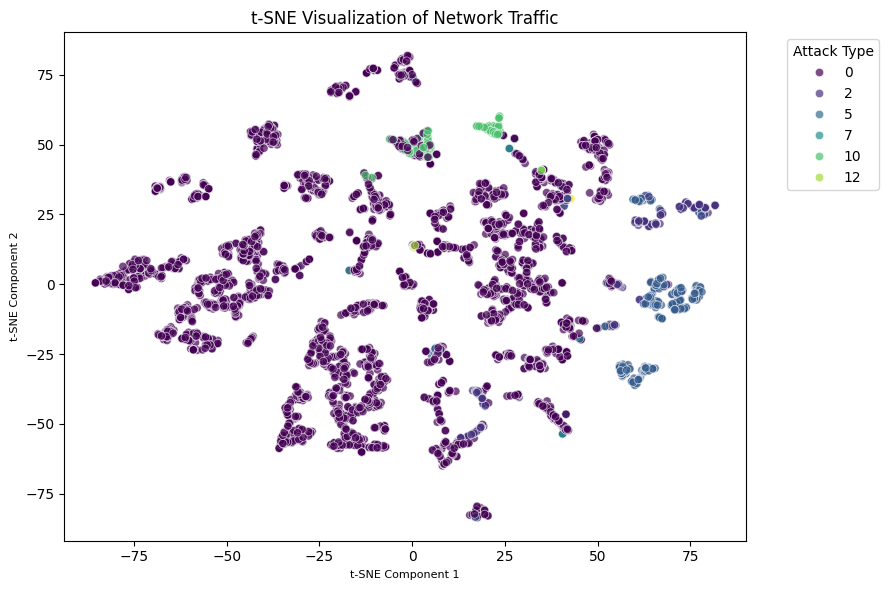

In [23]:
# Using t-SNE on a small sample for visualization
sample_for_tsne = df.sample(min(5000, len(df)), random_state=42)
X_tsne = sample_for_tsne.drop('label', axis=1)
y_tsne = sample_for_tsne['label']

# Standardize the data
scaler = StandardScaler()
X_tsne_scaled = scaler.fit_transform(X_tsne)

# Apply PCA first to reduce dimensions before t-SNE
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_tsne_scaled)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne_result = tsne.fit_transform(X_pca)

# Create DataFrame for plotting
tsne_df = pd.DataFrame({
    'tsne_1': X_tsne_result[:, 0],
    'tsne_2': X_tsne_result[:, 1],
    'label': y_tsne
})

# Plot t-SNE visualization
plt.figure(figsize=(9, 6))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_df, palette='viridis', alpha=0.7)
plt.title('t-SNE Visualization of Network Traffic', fontsize=12)
plt.xlabel('t-SNE Component 1', fontsize=8)
plt.ylabel('t-SNE Component 2', fontsize=8)
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

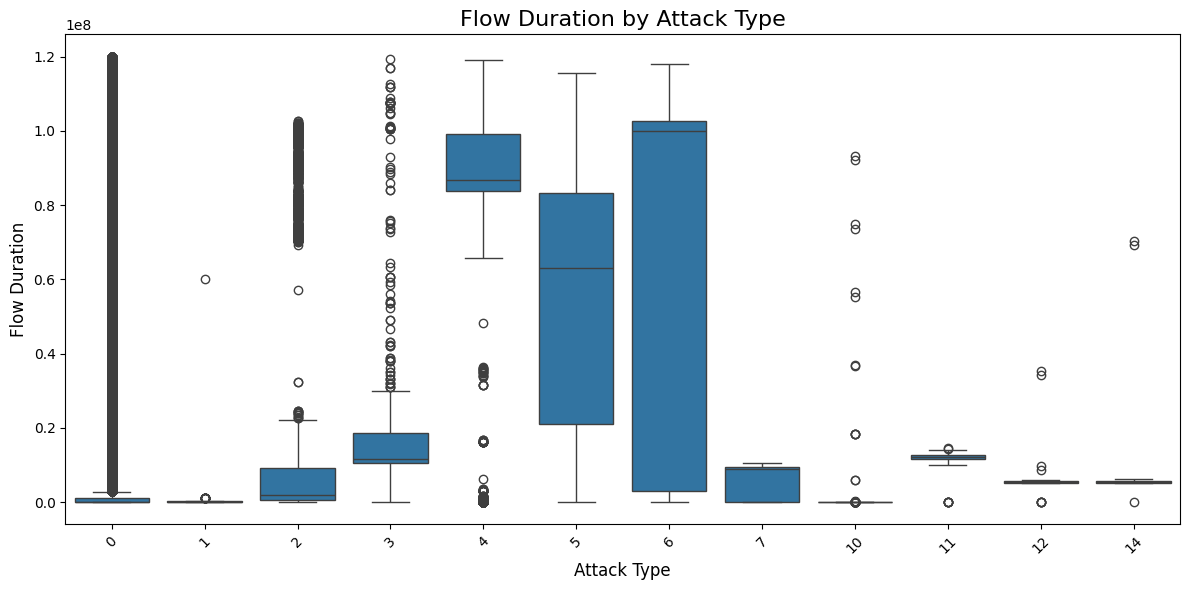

In [24]:
#Flow duration by attack type
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='flow duration', data=df_sample)
plt.title('Flow Duration by Attack Type', fontsize=16)
plt.xlabel('Attack Type', fontsize=12)
plt.ylabel('Flow Duration', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

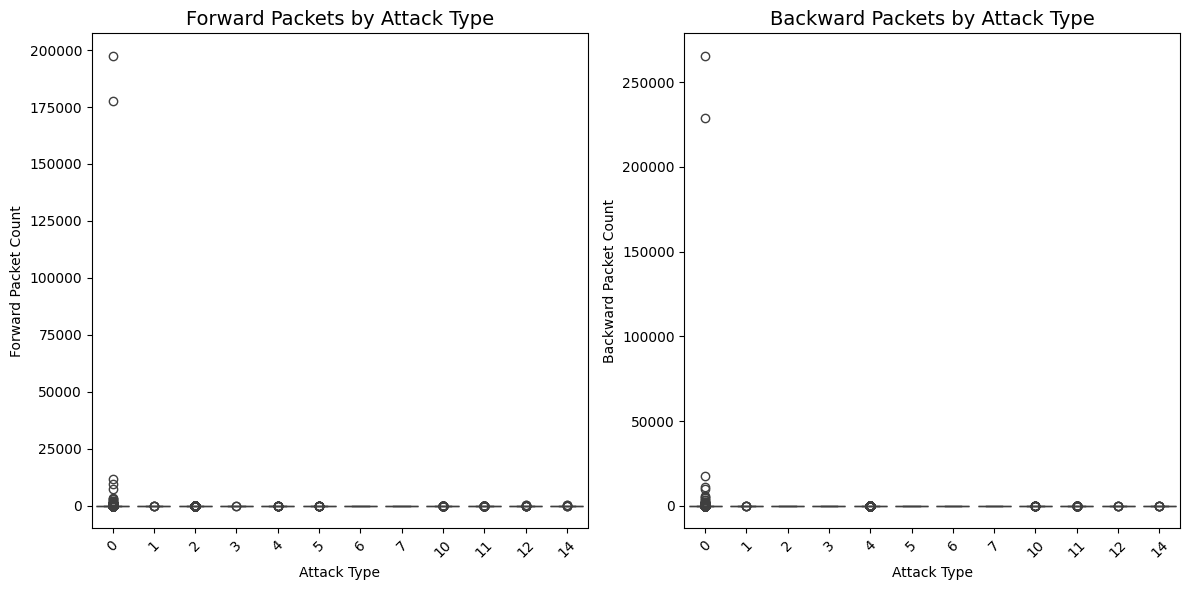

In [25]:
#Packet count analysis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='label', y='total fwd packets', data=df_sample)
plt.title('Forward Packets by Attack Type', fontsize=14)
plt.xlabel('Attack Type', fontsize=10)
plt.ylabel('Forward Packet Count', fontsize=10)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(x='label', y='total backward packets', data=df_sample)
plt.title('Backward Packets by Attack Type', fontsize=14)
plt.xlabel('Attack Type', fontsize=10)
plt.ylabel('Backward Packet Count', fontsize=10)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [26]:
X = df.drop('label', axis=1)
y = df['label']

In [27]:
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [31]:
cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer for multi-class
])

# Compile model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=5, batch_size=128,
                            validation_data=(X_test_cnn, y_test), verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
15755/15755 ━━━━━━━━━━━━━━━━━━━━ 364s 23ms/step - accuracy: 0.9710 - loss: 0.0843 - val_accuracy: 0.9858 - val_loss: 0.0356
Epoch 2/5
15755/15755 ━━━━━━━━━━━━━━━━━━━━ 360s 22ms/step - accuracy: 0.9848 - loss: 0.0332 - val_accuracy: 0.9869 - val_loss: 0.0286
Epoch 3/5
15755/15755 ━━━━━━━━━━━━━━━━━━━━ 389s 22ms/step - accuracy: 0.9868 - loss: 0.0290 - val_accuracy: 0.9864 - val_loss: 0.0285
Epoch 4/5
15755/15755 ━━━━━━━━━━━━━━━━━━━━ 341s 22ms/step - accuracy: 0.9876 - loss: 0.0274 - val_accuracy: 0.9885 - val_loss: 0.0249
Epoch 5/5
15755/15755 ━━━━━━━━━━━━━━━━━━━━ 337s 21ms/step - accuracy: 0.9889 - loss: 0.0252 - val_accuracy: 0.9924 - val_loss: 0.0218


In [32]:
cnn_pred = cnn_model.predict(X_test_cnn)
cnn_pred_classes = np.argmax(cnn_pred, axis=1)

15755/15755 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step


In [33]:
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile model
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
ann_history = ann_model.fit(X_train, y_train, epochs=5, batch_size=128,
                            validation_data=(X_test, y_test), verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
15755/15755 ━━━━━━━━━━━━━━━━━━━━ 69s 4ms/step - accuracy: 0.9669 - loss: 0.1086 - val_accuracy: 0.9788 - val_loss: 0.0439
Epoch 2/5
15755/15755 ━━━━━━━━━━━━━━━━━━━━ 64s 4ms/step - accuracy: 0.9826 - loss: 0.0399 - val_accuracy: 0.9869 - val_loss: 0.0313
Epoch 3/5
15755/15755 ━━━━━━━━━━━━━━━━━━━━ 84s 4ms/step - accuracy: 0.9859 - loss: 0.0336 - val_accuracy: 0.9918 - val_loss: 0.0235
Epoch 4/5
15755/15755 ━━━━━━━━━━━━━━━━━━━━ 70s 4ms/step - accuracy: 0.9919 - loss: 0.0239 - val_accuracy: 0.9888 - val_loss: 0.0268
Epoch 5/5
15755/15755 ━━━━━━━━━━━━━━━━━━━━ 67s 4ms/step - accuracy: 0.9926 - loss: 0.0229 - val_accuracy: 0.9926 - val_loss: 0.0265


In [34]:
ann_pred = ann_model.predict(X_test)
ann_pred_classes = np.argmax(ann_pred, axis=1)

15755/15755 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step


In [36]:
# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} Evaluation ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# Evaluate each model
evaluate_model(y_test, cnn_pred_classes, "CNN")
evaluate_model(y_test, ann_pred_classes, "ANN")


--- CNN Evaluation ---
Accuracy: 0.9924
Precision: 0.9927
Recall: 0.9924


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1-Score: 0.9921

Classification Report:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                            precision    recall  f1-score   support

                    BENIGN       1.00      0.99      1.00    419012
                       Bot       1.00      0.39      0.56       390
                      DDoS       1.00      1.00      1.00     25603
             DoS GoldenEye       0.98      0.99      0.99      2057
                  DoS Hulk       0.99      0.99      0.99     34569
          DoS Slowhttptest       0.89      0.99      0.94      1046
             DoS slowloris       0.98      0.99      0.98      1077
               FTP-Patator       1.00      1.00      1.00      1186
                Heartbleed       1.00      0.50      0.67         2
              Infiltration       1.00      0.29      0.44         7
                  PortScan       0.91      0.97      0.94     18139
               SSH-Patator       0.94      0.96      0.95       644
  Web Attack � Brute Force       0.95      0.13      0.23       294
Web Attack � Sql Injection       0.00      0.00

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


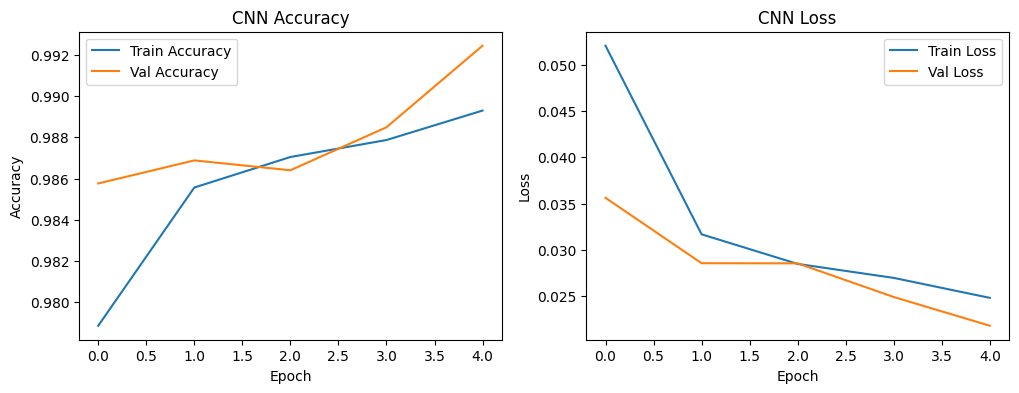

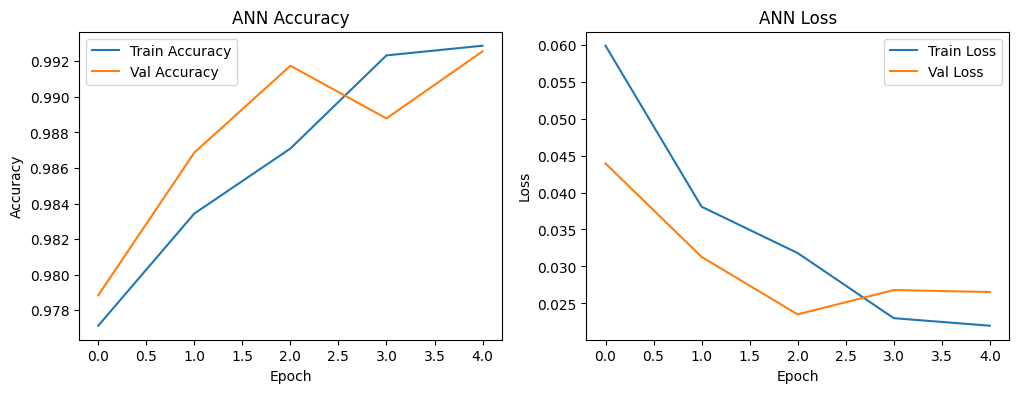

In [37]:
# Plot training history
def plot_history(history, model_name):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(cnn_history, "CNN")
plot_history(ann_history, "ANN")